<a href="https://colab.research.google.com/github/abhiruchipatilbhagat/ML-basic-codes/blob/main/MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample  # If oversampling is involved
from sklearn.model_selection import train_test_split

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fCone1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength  fWidth   fSize  fCone1     fAsym  fM3Long  fM3Trans  \
28.7967    16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
31.6036    11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
23.8172     9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
75.1362    30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

           fAlpha     fDist class  
28.7967   40.0920   81.8828     g  
31.6036    6.3609  205.2610     g  
162.0520  76.9600  256.7880     g  
23.8172   10.4490  116.7370     g  
75.1362    4.6480  356.4620     g

In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

just converting g and h to 0 and 1

In [ ]:
df.head()

fLength  fWidth   fSize  fCone1     fAsym  fM3Long  fM3Trans  \
28.7967    16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
31.6036    11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
23.8172     9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
75.1362    30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

           fAlpha     fDist  class  
28.7967   40.0920   81.8828      1  
31.6036    6.3609  205.2610      1  
162.0520  76.9600  256.7880      1  
23.8172   10.4490  116.7370      1  
75.1362    4.6480  356.4620      1

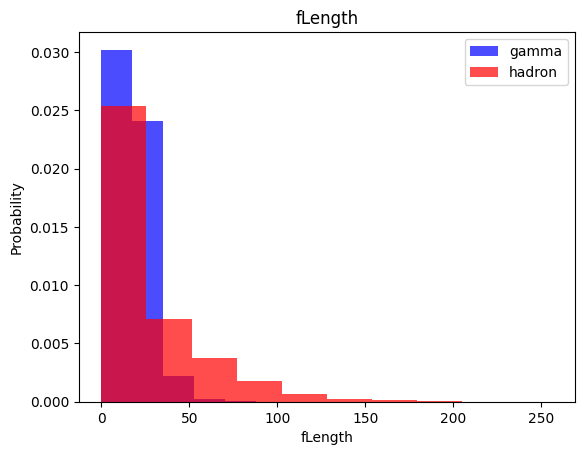

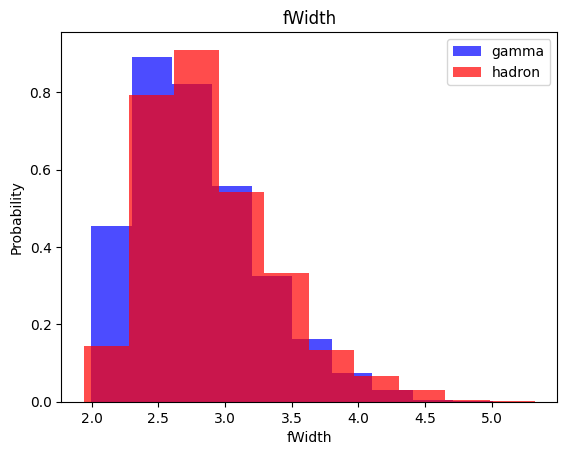

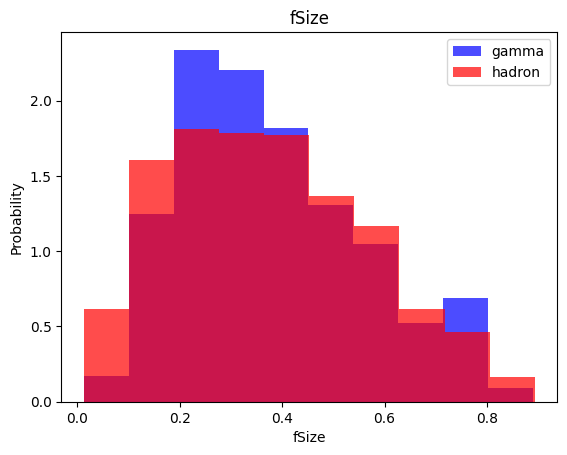

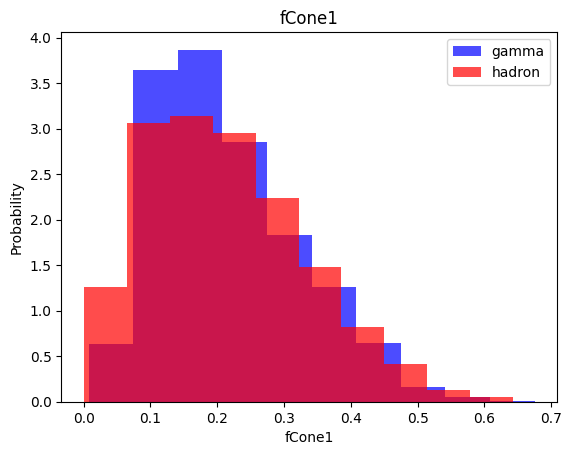

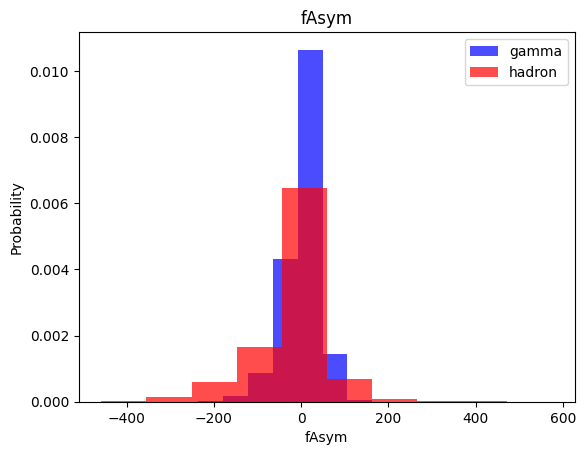

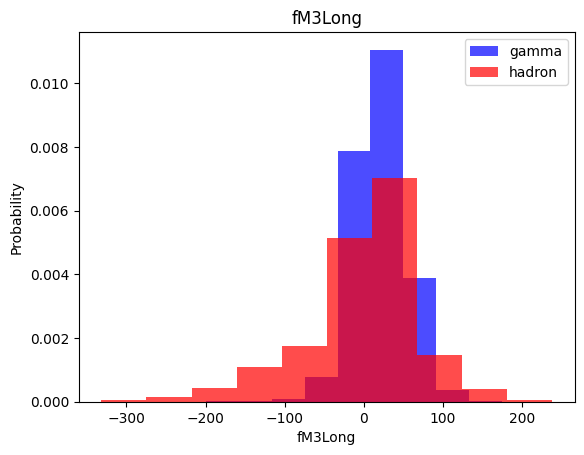

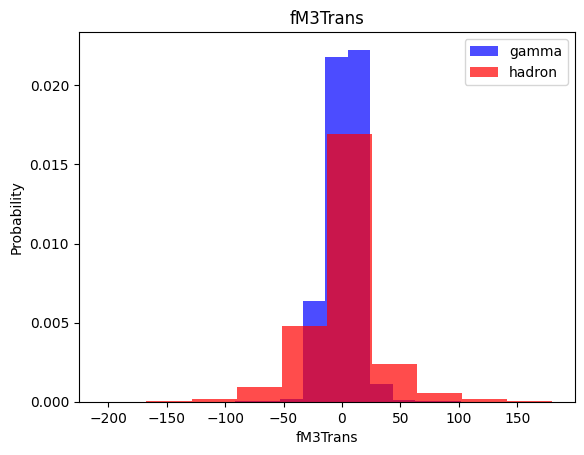

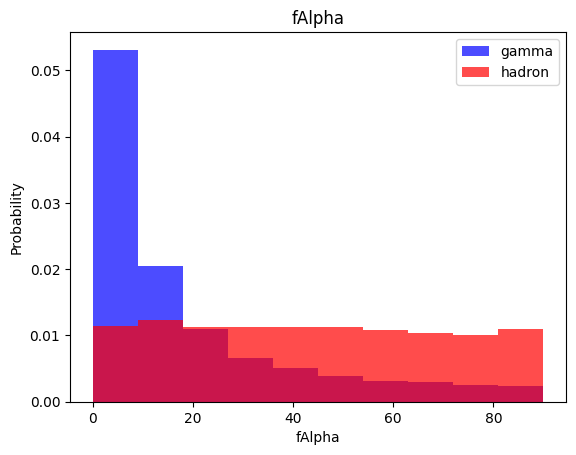

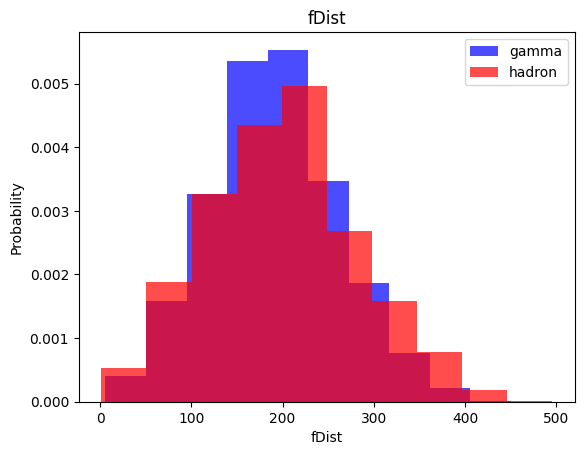

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


train, validation, testing

The error you're encountering suggests that there is an issue with the indexing of your DataFrame when attempting to split it into training, validation, and test sets. The sample(frac=1) method is shuffling the rows of the DataFrame, and then you're trying to split it based on certain indices.

The problem might be that the original indices of the DataFrame are not continuous, causing the KeyError when trying to access index 0. To fix this, you can reset the index of the DataFrame before splitting it. Here's an updated version of your code:

python
Copy code
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
df = df.reset_index(drop=True)  # Resetting the index to make it continuous

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
By resetting the index with reset_index(drop=True), you create a new DataFrame with a continuous index starting from 0. This should resolve the KeyError issue during the split.

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

x is 2D but y is 1D => reshape it

In [ ]:
print(len(train[train["class"]==1]))  #gamma
print(len(train[train["class"]==1]))  #hadrons

7415
7415


In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
len(y_train)

14830

In [ ]:
sum(y_train == 1)

7415

In [ ]:
sum(y_train == 0)

7415

kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1373
           1       0.85      0.85      0.85      2431

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.45      0.55      1373
           1       0.74      0.90      0.81      2431

    accuracy                           0.74      3804
   macro avg       0.73      0.67      0.68      3804
weighted avg       0.73      0.74      0.72      3804



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1373
           1       0.83      0.81      0.82      2431

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1373
           1       0.89      0.89      0.89      2431

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



Neural Net


In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(9,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

In [ ]:
plot_loss(history)
plot_accuracy(history)

16 nodes, dropout 0, lr 0.01, batch size 32


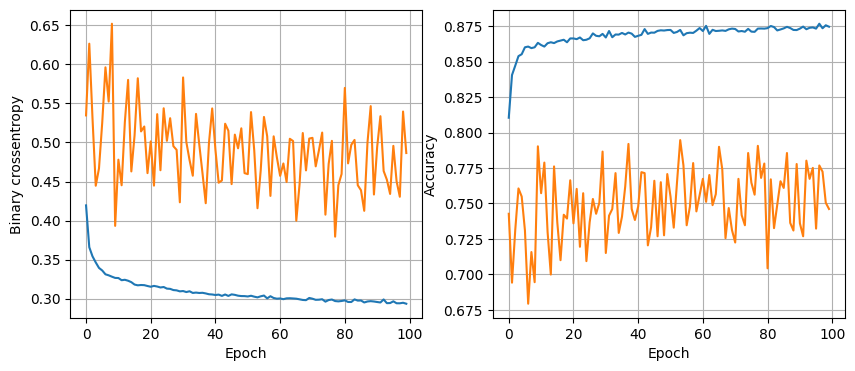

119/119 [==============================] - 0s 4ms/step - loss: 0.3634 - accuracy: 0.8541
16 nodes, dropout 0, lr 0.01, batch size 64


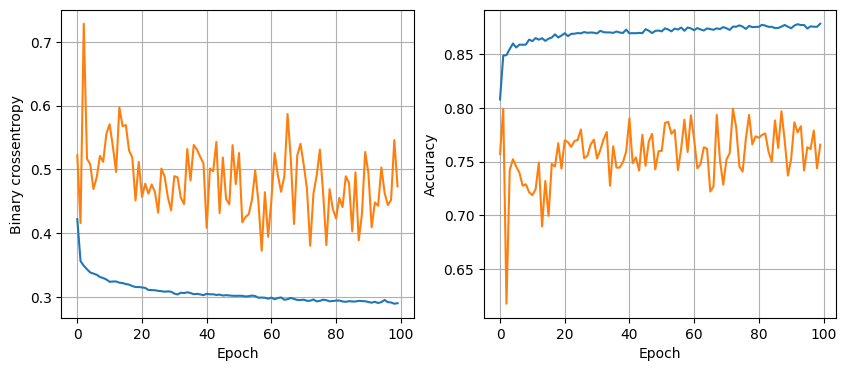

119/119 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8536
16 nodes, dropout 0, lr 0.01, batch size 128


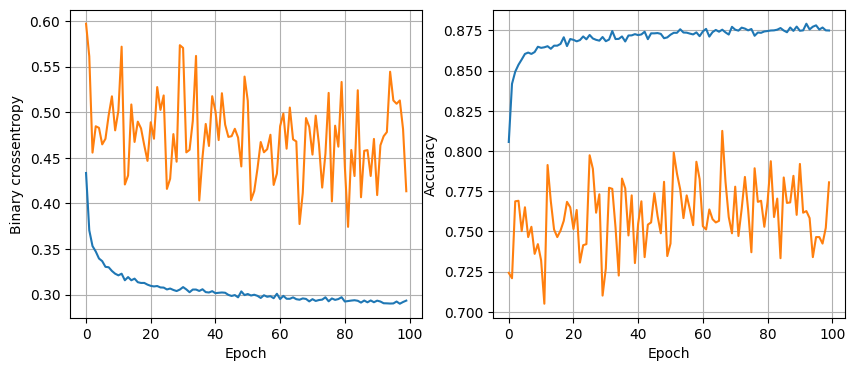

119/119 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8596
16 nodes, dropout 0, lr 0.005, batch size 32


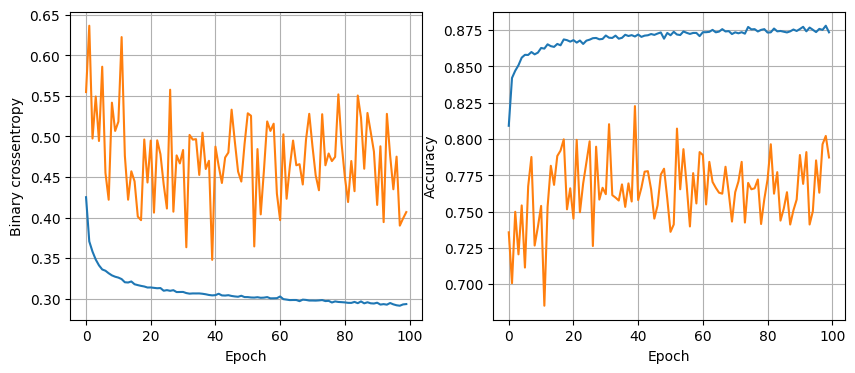

119/119 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.8528
16 nodes, dropout 0, lr 0.005, batch size 64


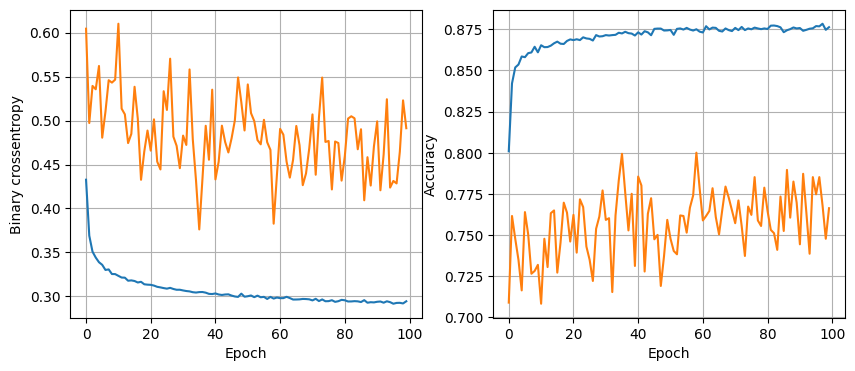

119/119 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8633
16 nodes, dropout 0, lr 0.005, batch size 128


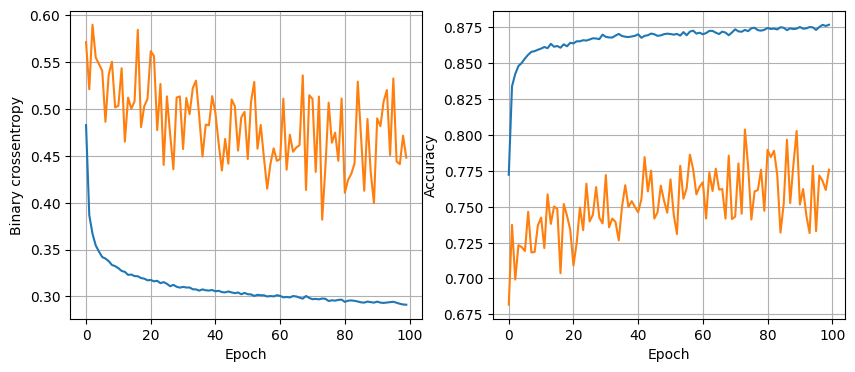

119/119 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8586
16 nodes, dropout 0, lr 0.001, batch size 32


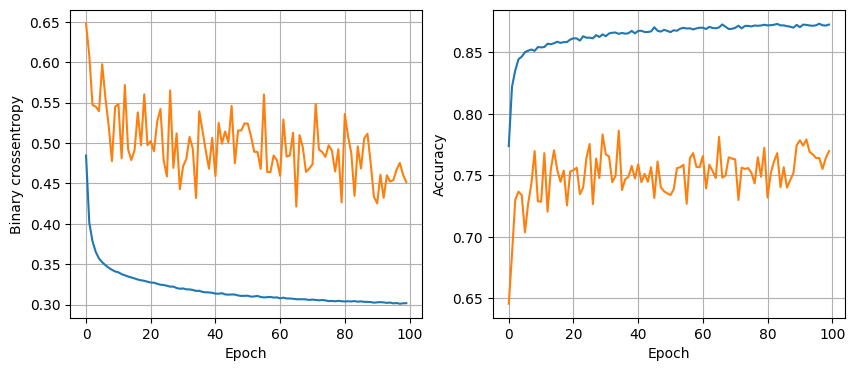

119/119 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8546
16 nodes, dropout 0, lr 0.001, batch size 64


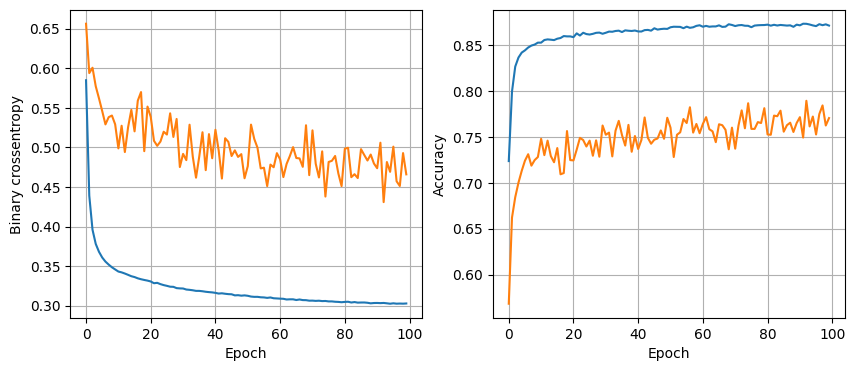

119/119 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8591
16 nodes, dropout 0, lr 0.001, batch size 128


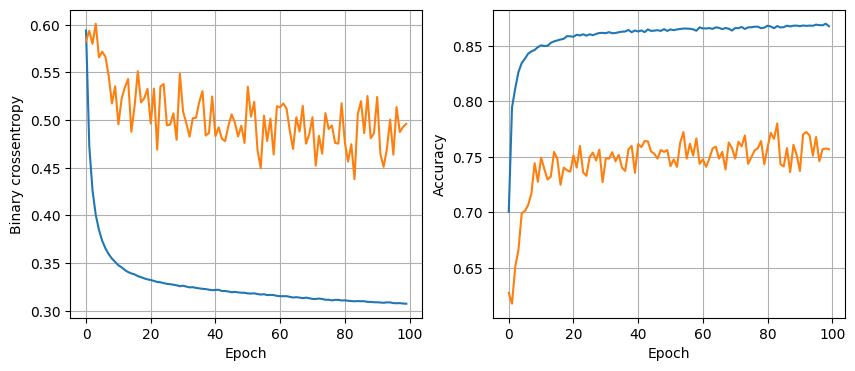

119/119 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8541
16 nodes, dropout 0.2, lr 0.01, batch size 32


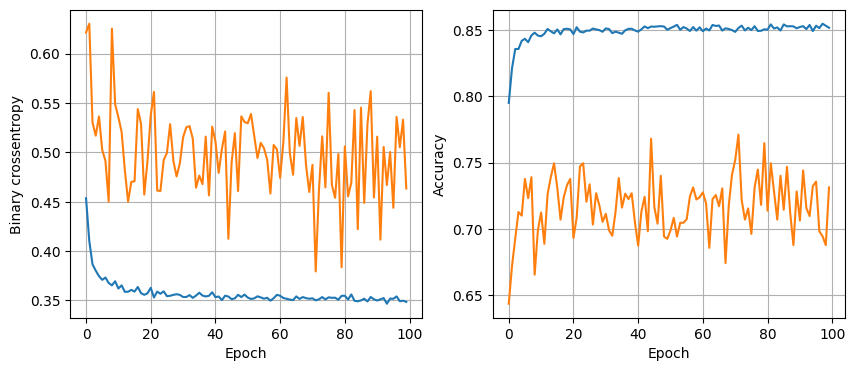

119/119 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8591
16 nodes, dropout 0.2, lr 0.01, batch size 64


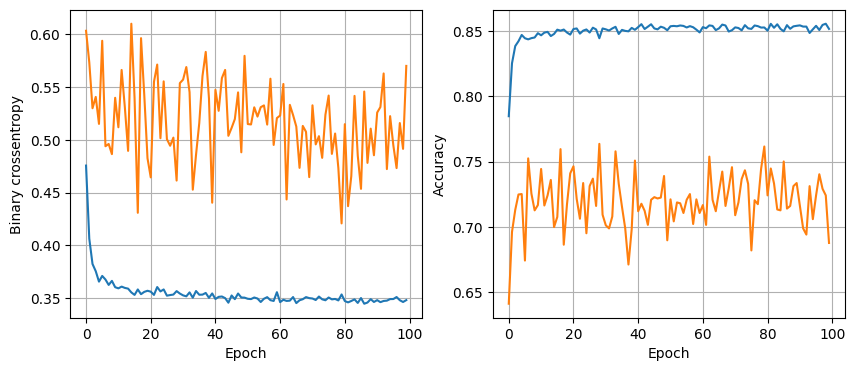

119/119 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8573
16 nodes, dropout 0.2, lr 0.01, batch size 128


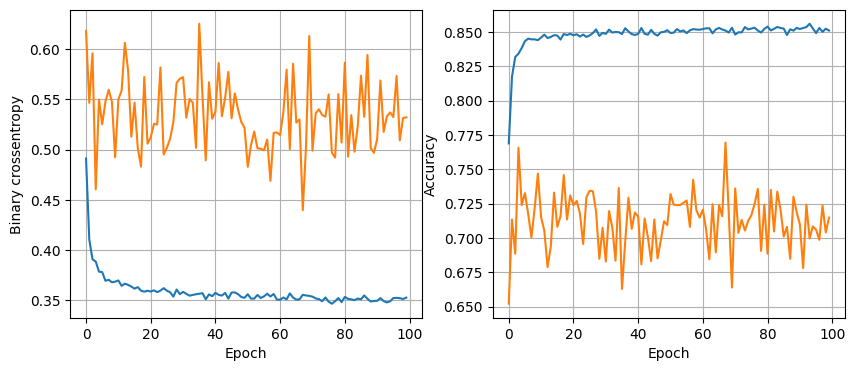

119/119 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8586
16 nodes, dropout 0.2, lr 0.005, batch size 32


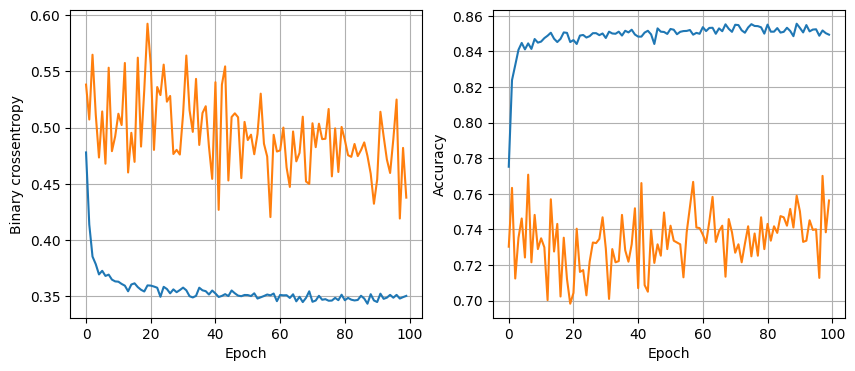

119/119 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8515
16 nodes, dropout 0.2, lr 0.005, batch size 64


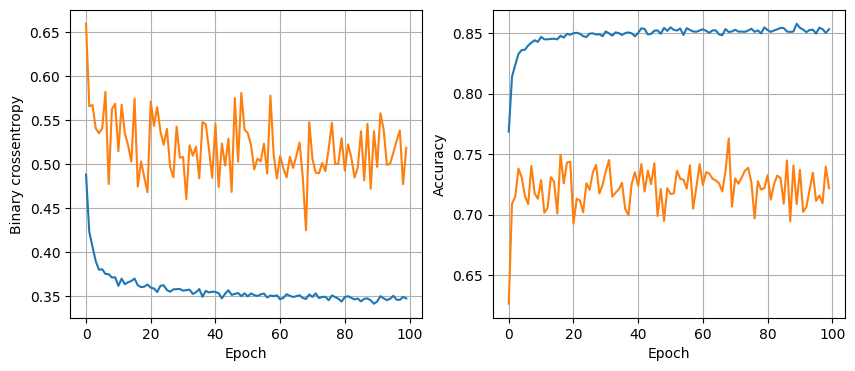

119/119 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8625
16 nodes, dropout 0.2, lr 0.005, batch size 128


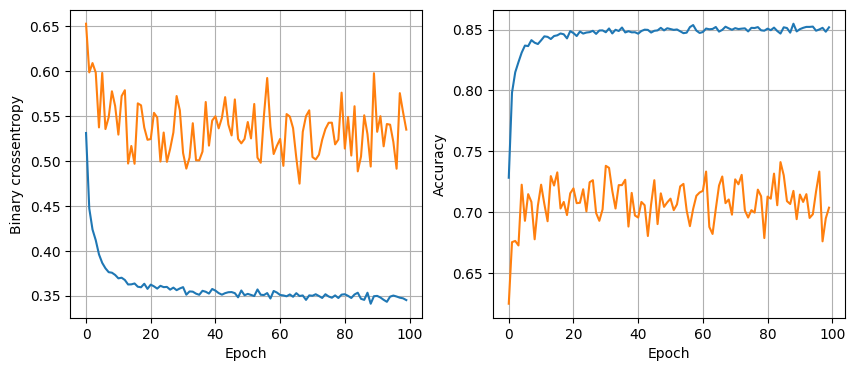

119/119 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8586
16 nodes, dropout 0.2, lr 0.001, batch size 32


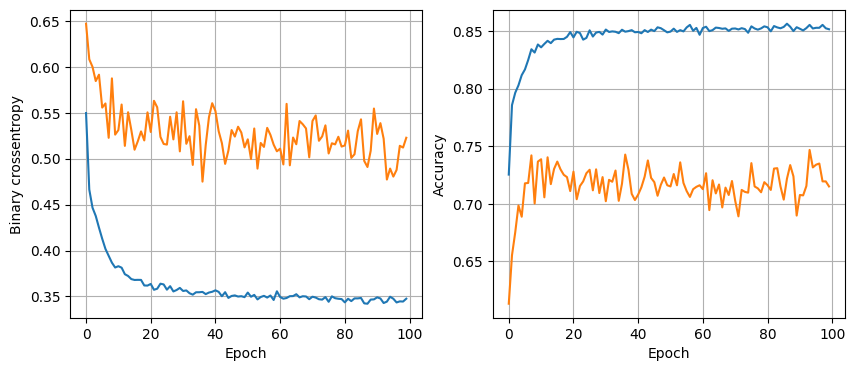

119/119 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8601
16 nodes, dropout 0.2, lr 0.001, batch size 64


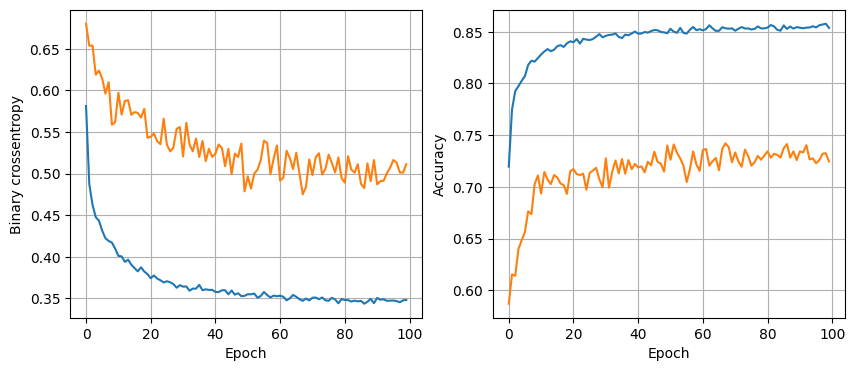

119/119 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8594
16 nodes, dropout 0.2, lr 0.001, batch size 128


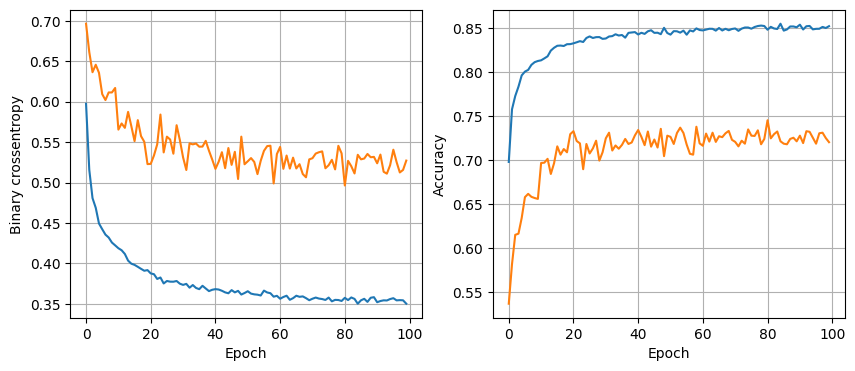

119/119 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8552
32 nodes, dropout 0, lr 0.01, batch size 32


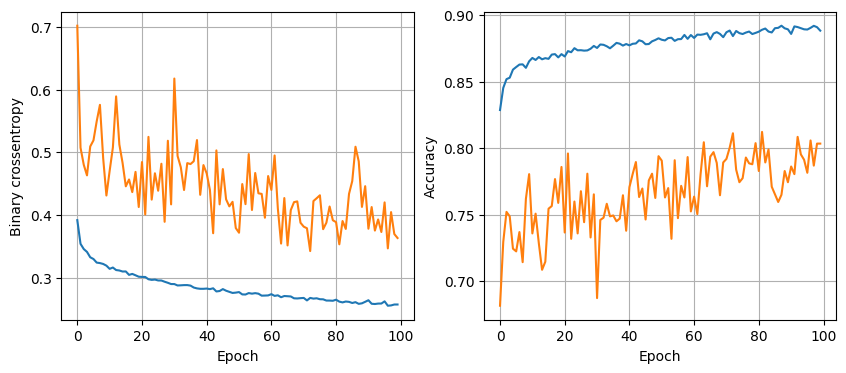

119/119 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8483
32 nodes, dropout 0, lr 0.01, batch size 64


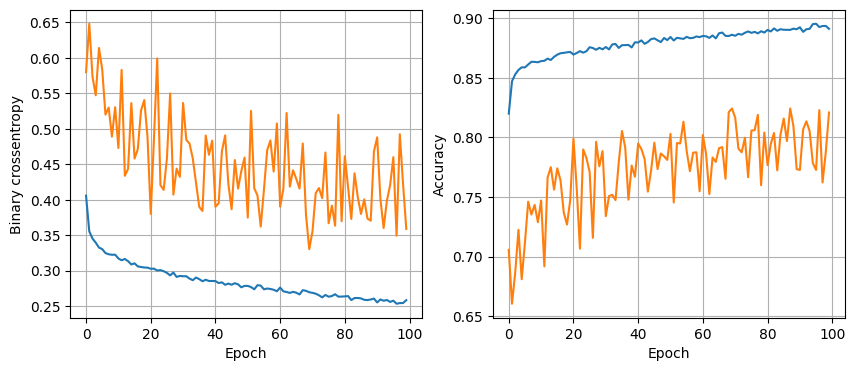

119/119 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8507
32 nodes, dropout 0, lr 0.01, batch size 128


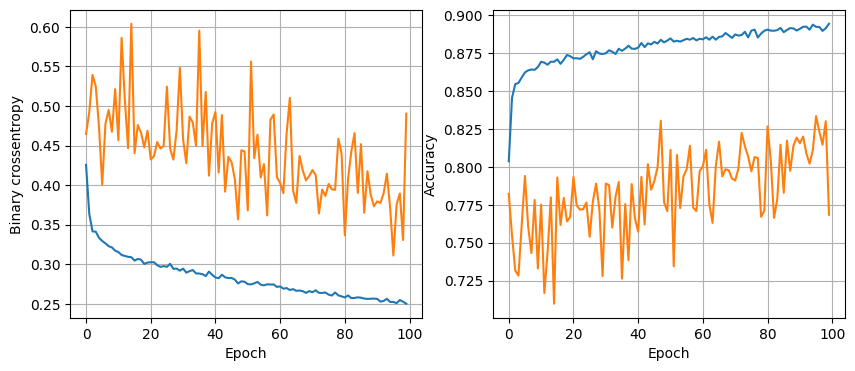

119/119 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8483
32 nodes, dropout 0, lr 0.005, batch size 32


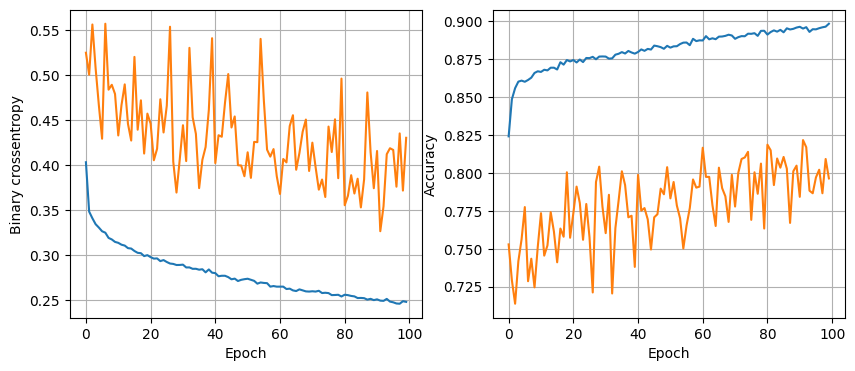

119/119 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8541
32 nodes, dropout 0, lr 0.005, batch size 64


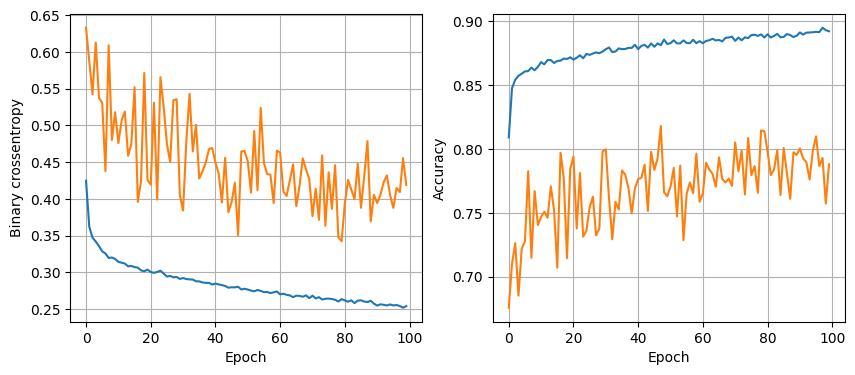

119/119 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8507
32 nodes, dropout 0, lr 0.005, batch size 128


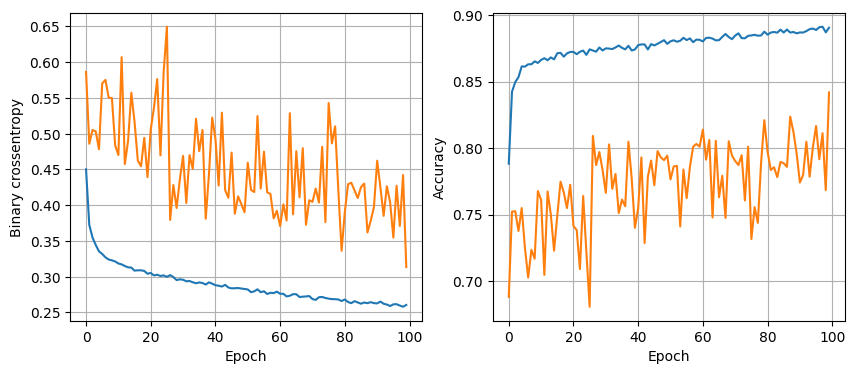

119/119 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8465
32 nodes, dropout 0, lr 0.001, batch size 32


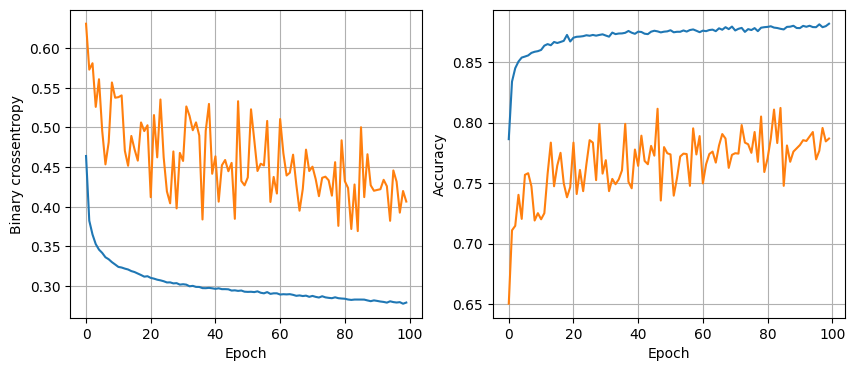

119/119 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8583
32 nodes, dropout 0, lr 0.001, batch size 64


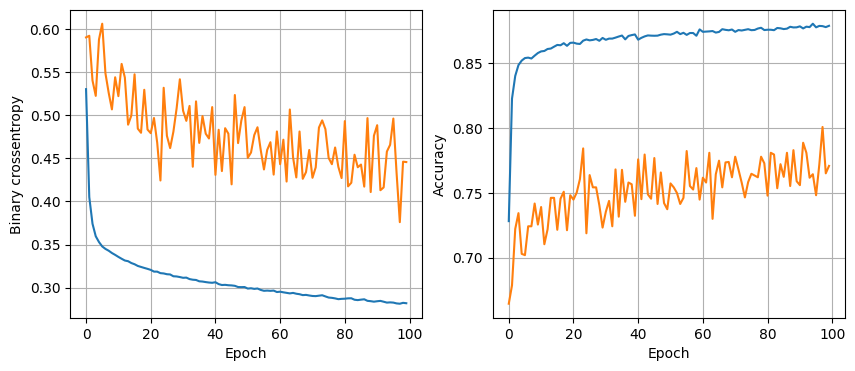

119/119 [==============================] - 0s 3ms/step - loss: 0.3423 - accuracy: 0.8533
32 nodes, dropout 0, lr 0.001, batch size 128


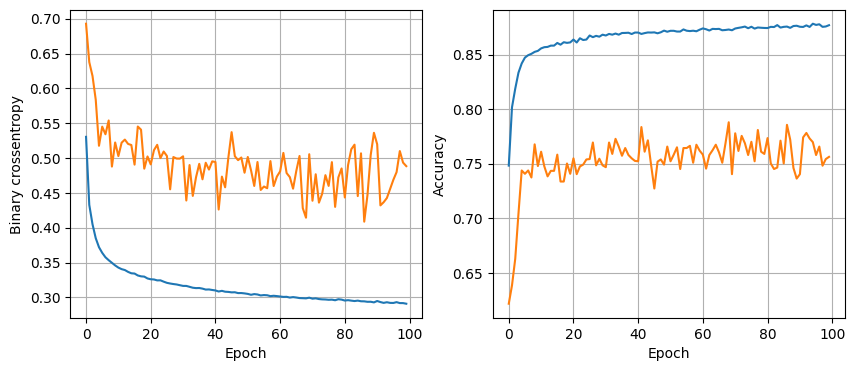

119/119 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8617
32 nodes, dropout 0.2, lr 0.01, batch size 32


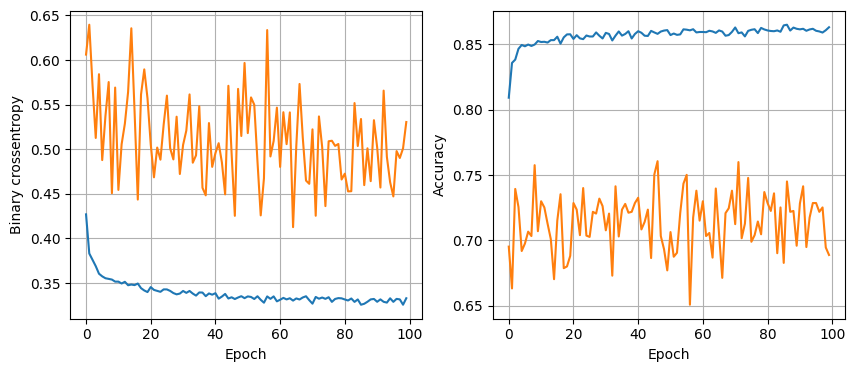

119/119 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8546
32 nodes, dropout 0.2, lr 0.01, batch size 64


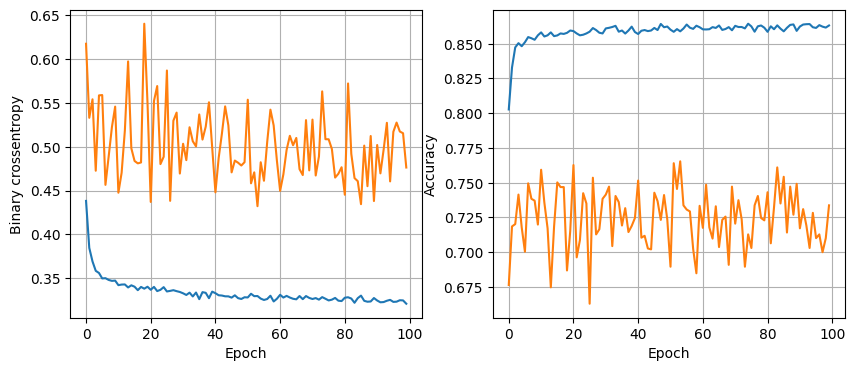

119/119 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8594
32 nodes, dropout 0.2, lr 0.01, batch size 128


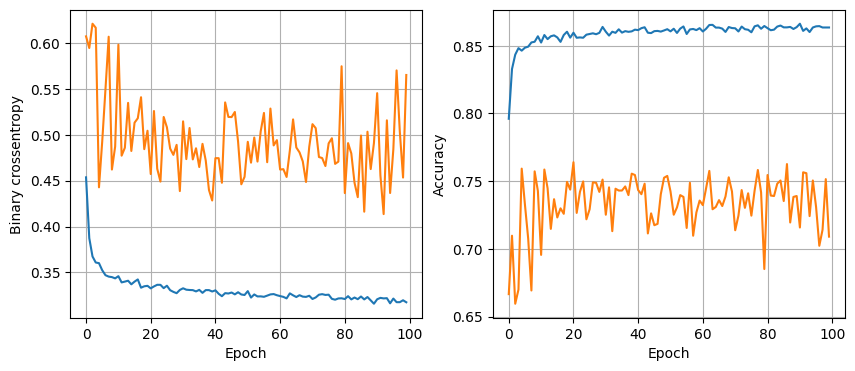

119/119 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8594
32 nodes, dropout 0.2, lr 0.005, batch size 32


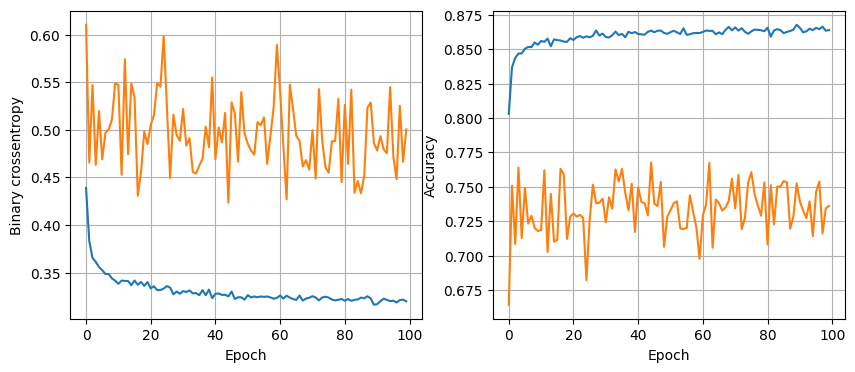

119/119 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8573
32 nodes, dropout 0.2, lr 0.005, batch size 64


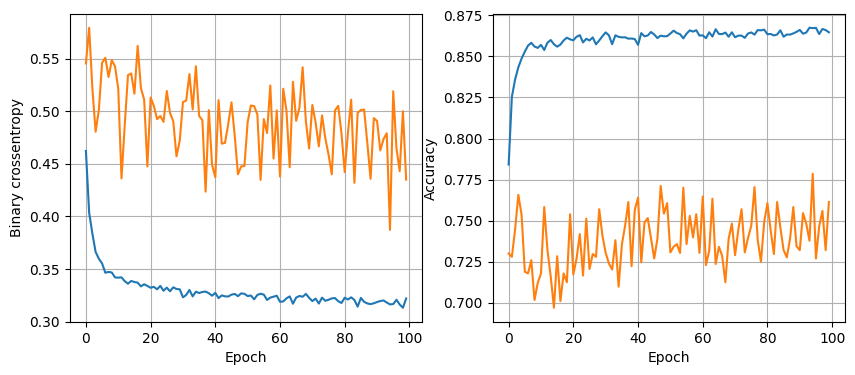

119/119 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8596
32 nodes, dropout 0.2, lr 0.005, batch size 128


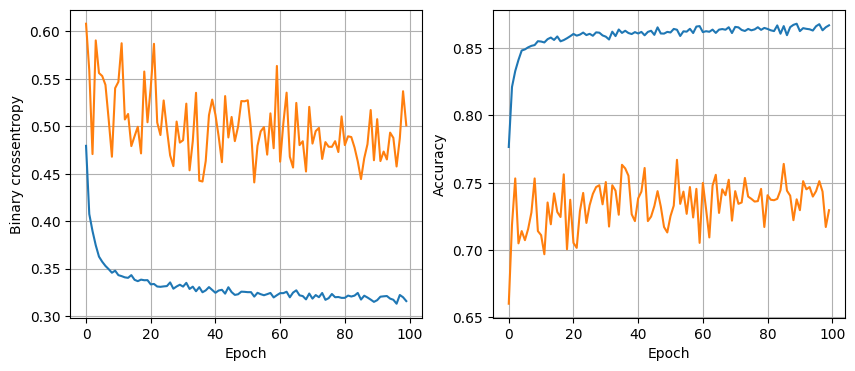

119/119 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8546
32 nodes, dropout 0.2, lr 0.001, batch size 32


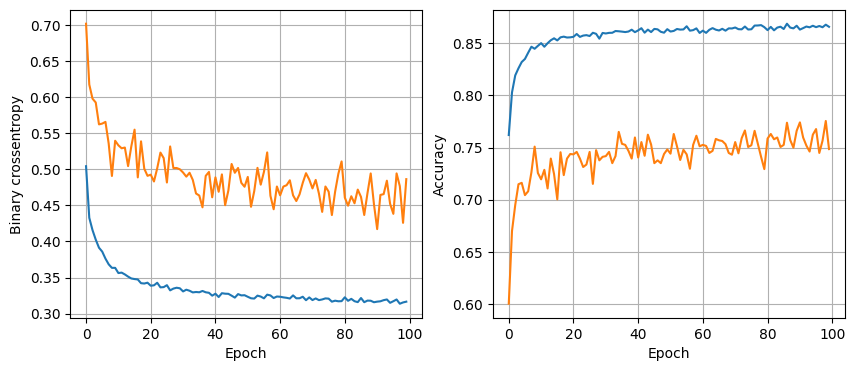

119/119 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8638
32 nodes, dropout 0.2, lr 0.001, batch size 64


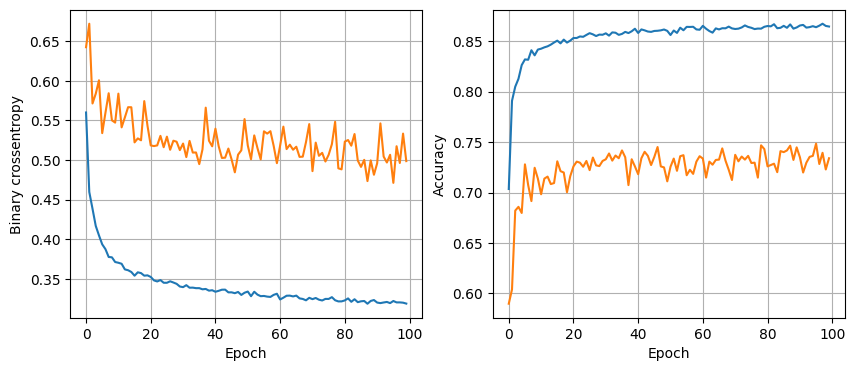

119/119 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8620
32 nodes, dropout 0.2, lr 0.001, batch size 128


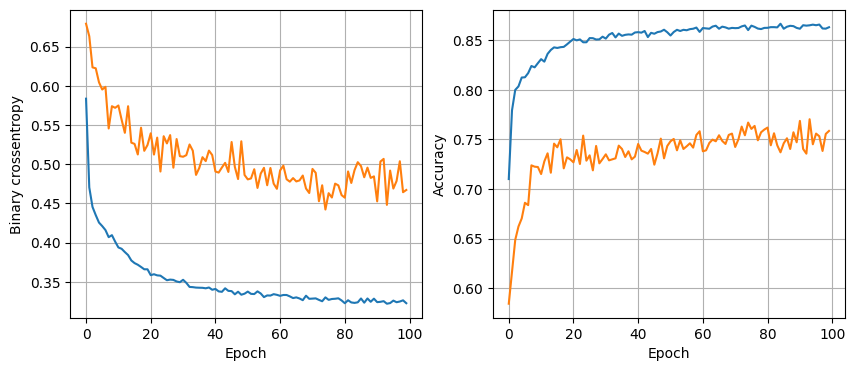

119/119 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8644
64 nodes, dropout 0, lr 0.01, batch size 32


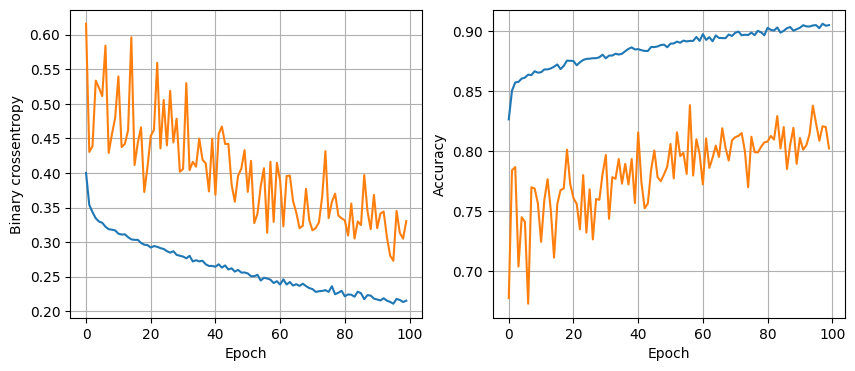

119/119 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.8420
64 nodes, dropout 0, lr 0.01, batch size 64


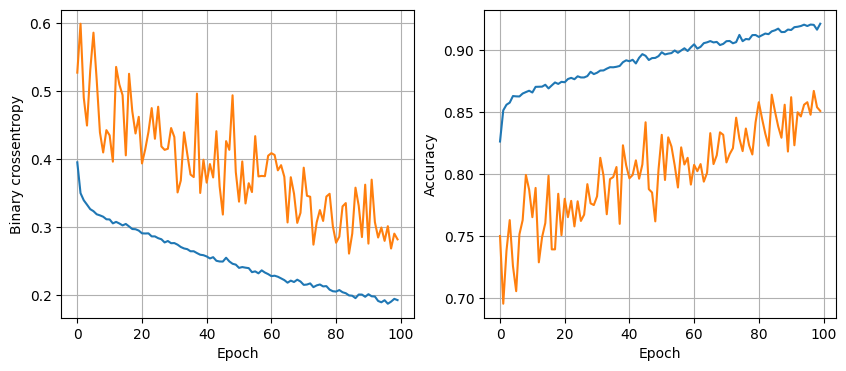

119/119 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.8436
64 nodes, dropout 0, lr 0.01, batch size 128


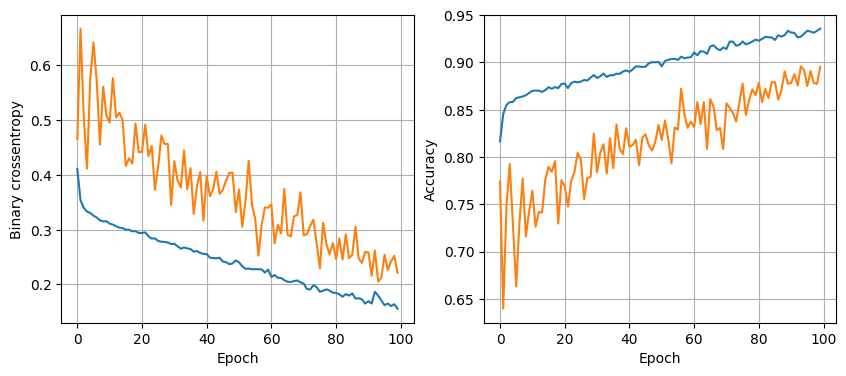

119/119 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.8460
64 nodes, dropout 0, lr 0.005, batch size 32


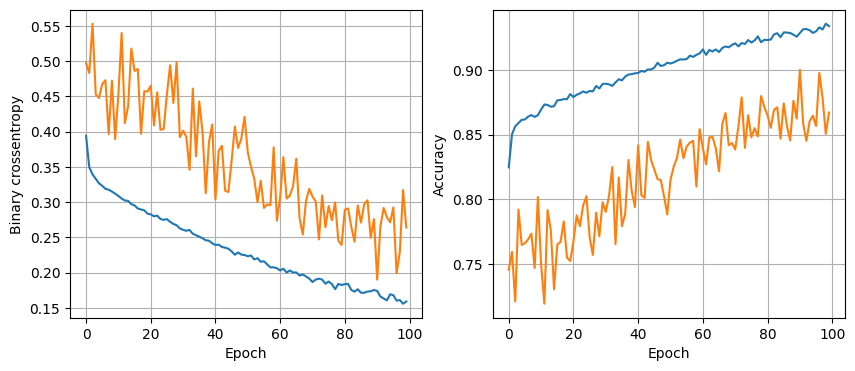

119/119 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.8404
64 nodes, dropout 0, lr 0.005, batch size 64


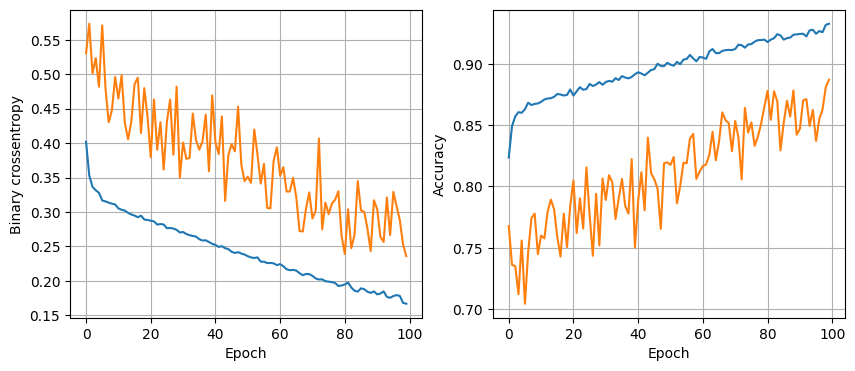

119/119 [==============================] - 0s 3ms/step - loss: 0.5461 - accuracy: 0.8410
64 nodes, dropout 0, lr 0.005, batch size 128


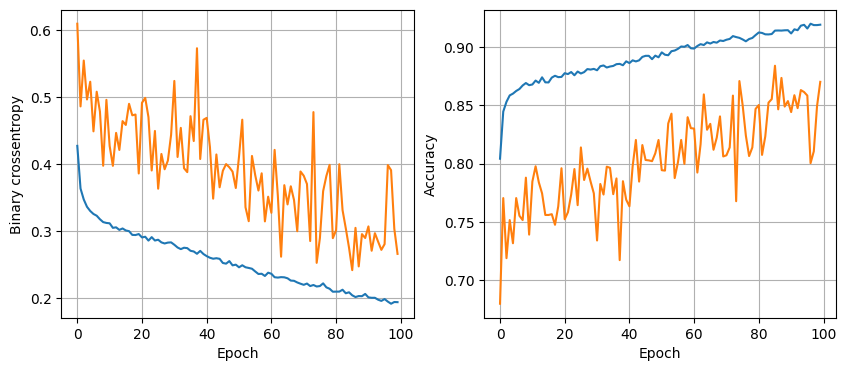

119/119 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.8462
64 nodes, dropout 0, lr 0.001, batch size 32


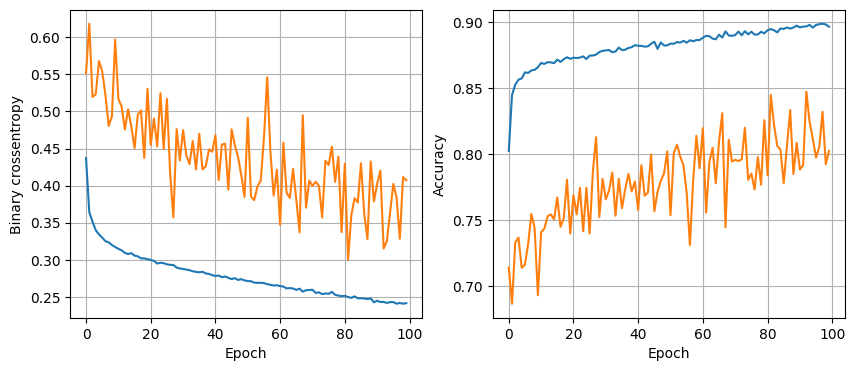

119/119 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8575
64 nodes, dropout 0, lr 0.001, batch size 64


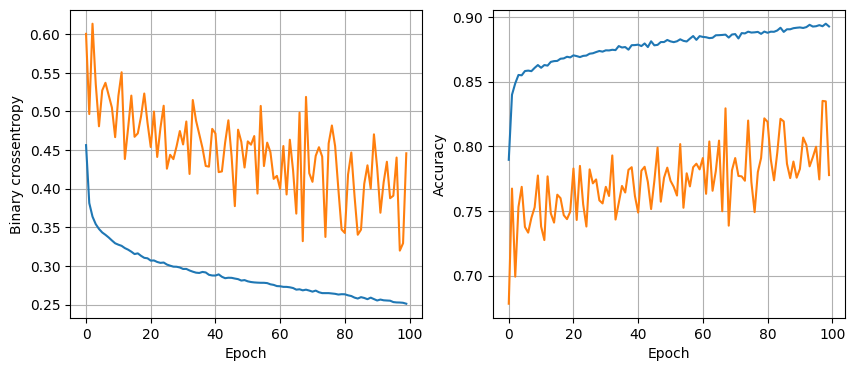

119/119 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8559
64 nodes, dropout 0, lr 0.001, batch size 128


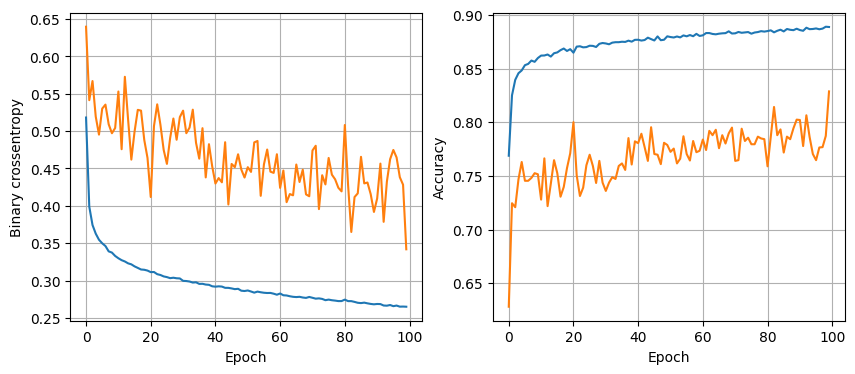

119/119 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8533
64 nodes, dropout 0.2, lr 0.01, batch size 32


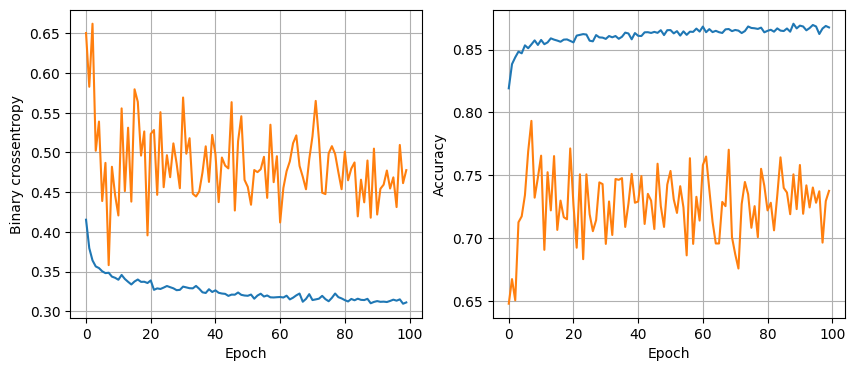

119/119 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8588
64 nodes, dropout 0.2, lr 0.01, batch size 64


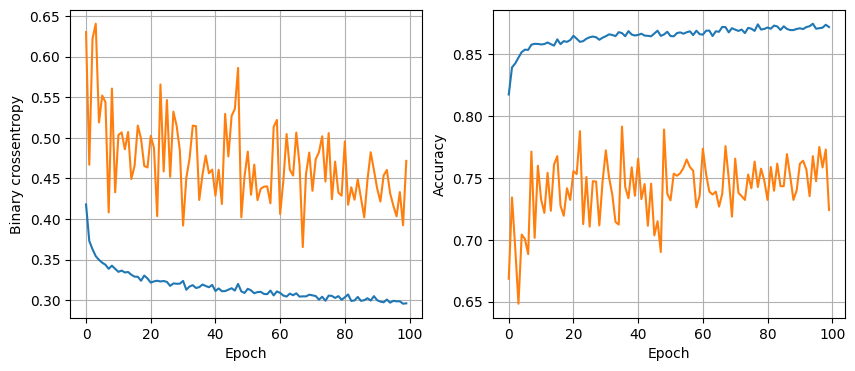

119/119 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8554
64 nodes, dropout 0.2, lr 0.01, batch size 128


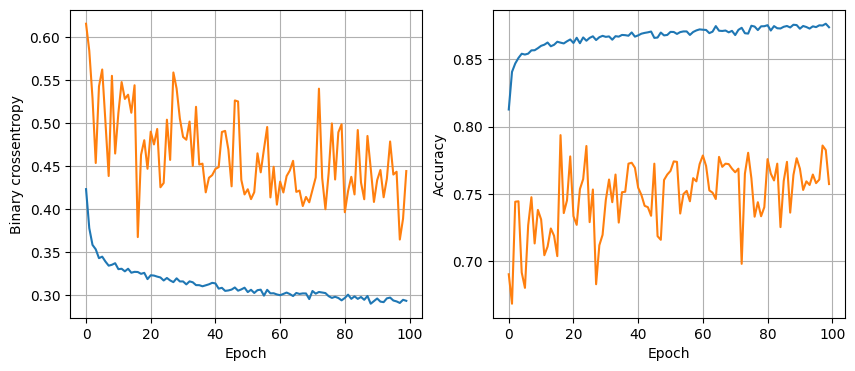

119/119 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8575
64 nodes, dropout 0.2, lr 0.005, batch size 32


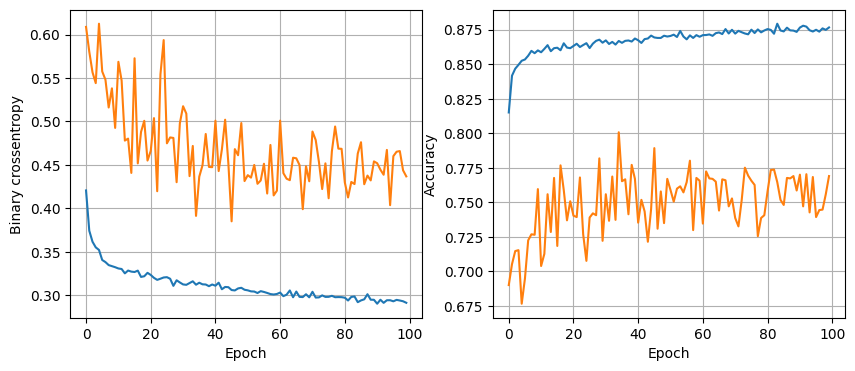

119/119 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8583
64 nodes, dropout 0.2, lr 0.005, batch size 64


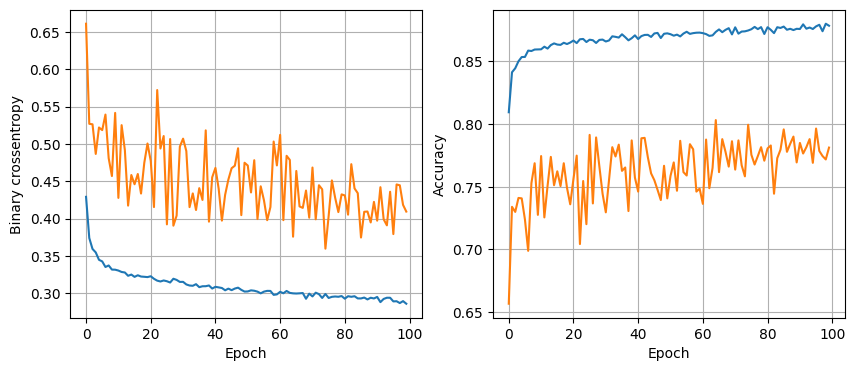

119/119 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8552
64 nodes, dropout 0.2, lr 0.005, batch size 128


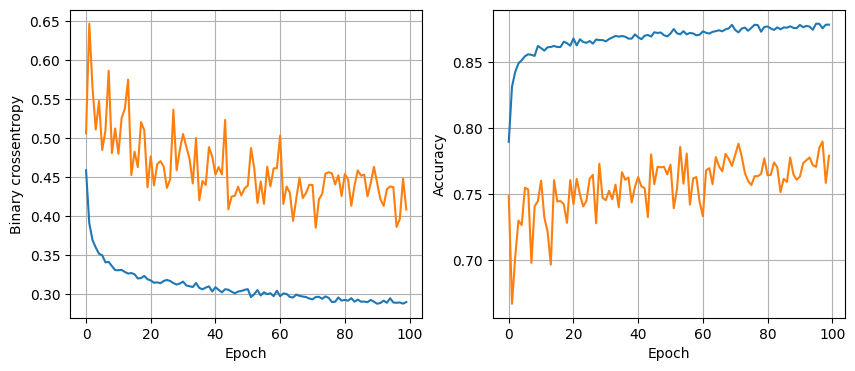

119/119 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8625
64 nodes, dropout 0.2, lr 0.001, batch size 32


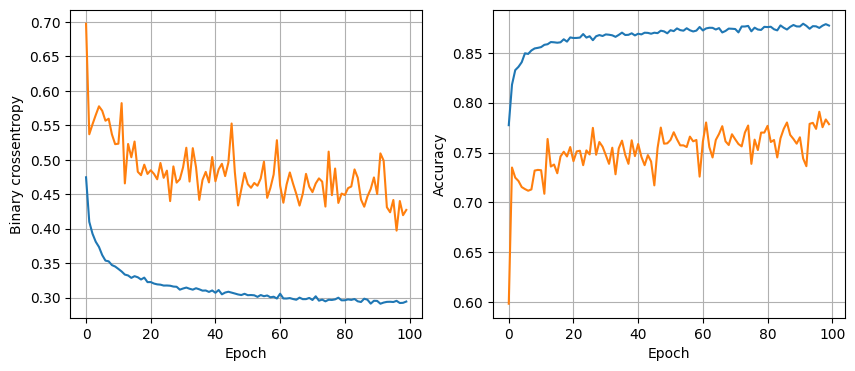

119/119 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8583
64 nodes, dropout 0.2, lr 0.001, batch size 64


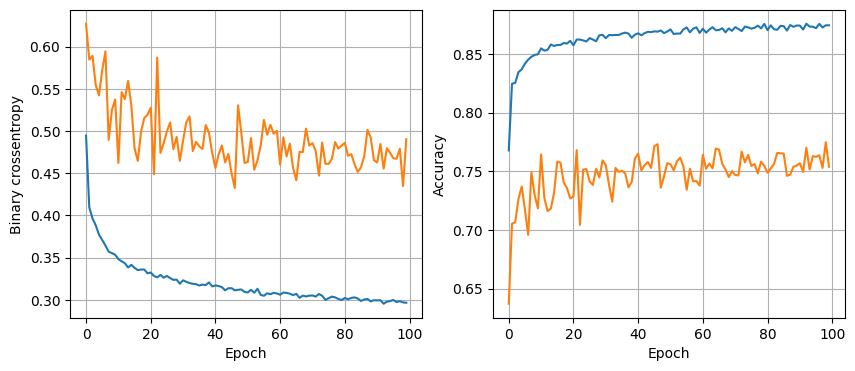

119/119 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8641
64 nodes, dropout 0.2, lr 0.001, batch size 128


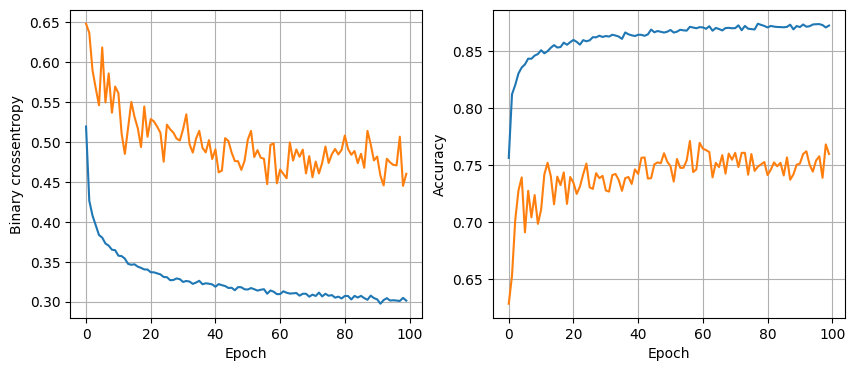

119/119 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8604


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 [==============================] - 0s 3ms/step


array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80      1373
           1       0.86      0.94      0.90      2431

    accuracy                           0.86      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804

